In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SVM import HardMarginSVC, SoftmarginSVC, SoftmarginSVCPrimal, LinearSVM, PolySVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.preprocessing import PolynomialFeatures


In [2]:
data = pd.read_csv(r"F:\Machine Learning\course ML arabic Ahmed Rady\Day 36\nonlinear_data.csv")
data

,Feature 1,Feature 2,Label
0,3.764052,2.400157,0.0
1,2.978738,4.240893,0.0
2,3.867558,1.022722,0.0
3,2.950088,1.848643,0.0
4,1.896781,2.410599,0.0
...,...,...,...
495,0.441033,0.178793,1.0
496,-0.799422,0.240788,1.0
497,0.289121,0.412871,1.0
498,-0.198399,0.094192,1.0


In [3]:
X = data.drop(["Label"],axis=1)
y = data["Label"]
y = np.where(y==0,-1,1)

In [4]:
scaler = StandardScaler()
X_Std = scaler.fit_transform(X)

In [5]:
model = HardMarginSVC()
model.fit(X_Std,y)

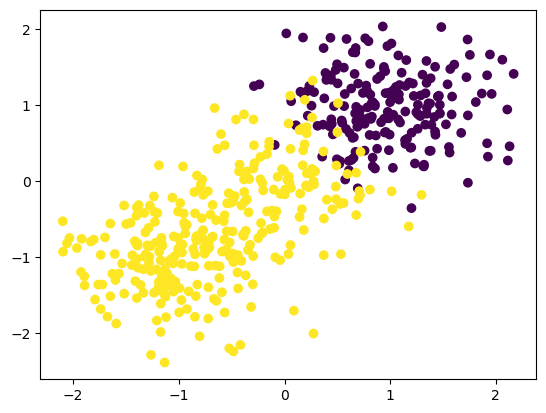

In [6]:
plt.scatter(X_Std[:,0],X_Std[:,1],c=y)

3.872859922035572


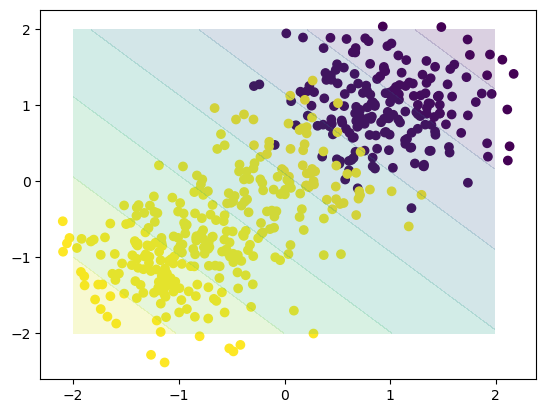

In [7]:
plt.scatter(X_Std[:,0],X_Std[:,1],c=y)
xx1,xx2=np.meshgrid(
    np.arange(-2,2,0.01),
    np.arange(-2,2,0.01)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.decision_function(meshgred_points)
z = z.reshape(xx1.shape)
plt.contourf(xx1,xx2,z,alpha=0.2)
print(model.b)


In [8]:
model = SoftmarginSVC(learning_rate=0.001,C=0.002)
model.fit(X_Std,y)

0.954


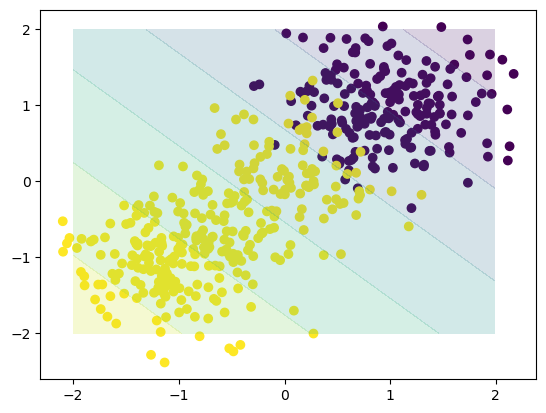

In [9]:
plt.scatter(X_Std[:,0],X_Std[:,1],c=y)
xx1,xx2=np.meshgrid(
    np.arange(-2,2,0.01),
    np.arange(-2,2,0.01)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.decision_function(meshgred_points)
z = z.reshape(xx1.shape)
plt.contourf(xx1,xx2,z,alpha=0.2)
print(model.score(X_Std,y))


In [10]:
model = LinearSVC()
model.fit(X_Std,y)

LinearSVC()

0.962


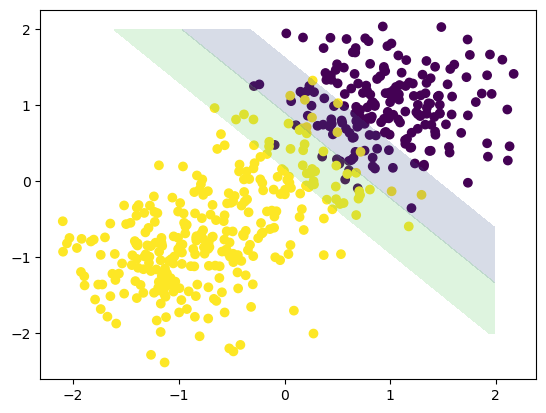

In [11]:
plt.scatter(X_Std[:, 0], X_Std[:, 1], c=y)
meshgred_points = np.array([xx1.ravel(), xx2.ravel()]).T
z = model.decision_function(meshgred_points)
z = z.reshape(xx1.shape)
xx1, xx2 = np.meshgrid(
    np.arange(-2, 2, 0.01),
    np.arange(-2, 2, 0.01)
)
plt.contourf(xx1, xx2, z, alpha=0.2, levels=[-1, 0, 1])
print(model.score(X_Std,y))


0.958


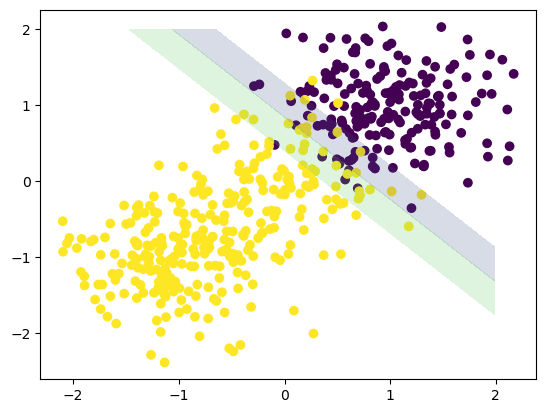

In [12]:
model = SoftmarginSVCPrimal()
model.fit(X_Std,y)
plt.scatter(X_Std[:,0],X_Std[:,1],c=y)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.decision_function(meshgred_points)
z = z.reshape(xx1.shape)
xx1,xx2=np.meshgrid(
    np.arange(-2,2,0.01),
    np.arange(-2,2,0.01)
)
plt.contourf(xx1,xx2,z,alpha=0.2,levels = [-1,0,1])
print(model.score(X_Std,y))

In [13]:
data = pd.read_csv(r"F:\Machine Learning\course ML arabic Ahmed Rady\Day 38\circle_data.csv")
data

,Feature 1,Feature 2,Label
0,0.893586,-0.351167,0
1,0.621767,0.808279,0
2,-0.232287,0.836077,0
3,-0.340426,-0.067212,1
4,-0.136397,0.433088,1
...,...,...,...
195,0.240742,0.069092,1
196,0.554566,0.715996,0
197,0.626031,-0.413289,0
198,0.113632,-0.299066,1


In [14]:
X = data.drop(["Label"],axis=1)
y = data["Label"]
y = np.where(y==0,-1,1)
scaler = StandardScaler()
X_Std = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=2)
X_Poly =poly.fit_transform(X_Std) 

1.0


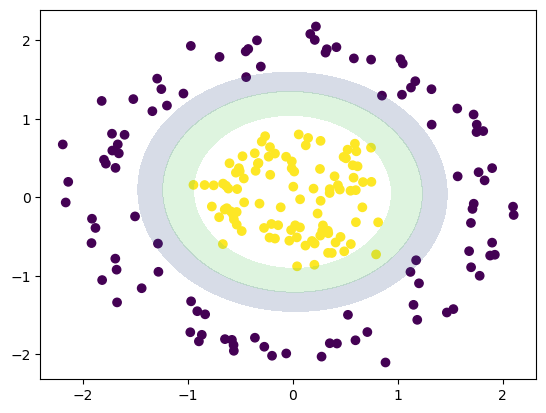

In [15]:
model = LinearSVM()
model.fit(X_Poly,y)
plt.scatter(X_Std[:,0],X_Std[:,1],c=y)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
meshgred_poly = poly.fit_transform(meshgred_points)
z = model.decision_function(meshgred_poly)
z = z.reshape(xx1.shape)
xx1,xx2=np.meshgrid(
    np.arange(-2,2,0.01),
    np.arange(-2,2,0.01)
)
plt.contourf(xx1,xx2,z,alpha=0.2,levels = [-1,0,1])
print(model.score(X_Poly,y))

1.0

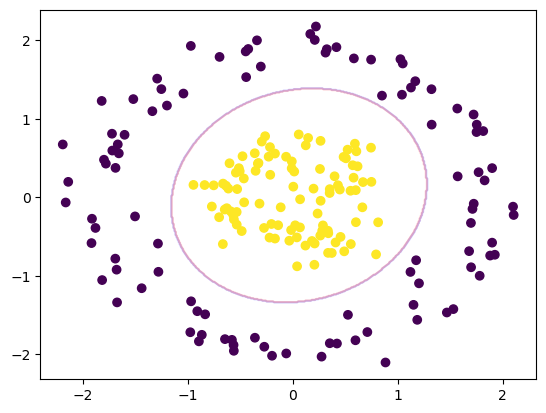

In [16]:
model = PolySVM(learning_rate=0.001,kernal="poly",degree=2)
model.fit(X_Std,y)
plt.scatter(X_Std[:,0],X_Std[:,1],c = y)
xx1, xx2 = np.meshgrid(
    np.arange(-2,2,.01),
    np.arange(-2,2,.01)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgred_points)
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z,alpha = .2,levels = [-1,0,1],colors = ["b","r","b"])
model.score(X_Std,y)

1.0

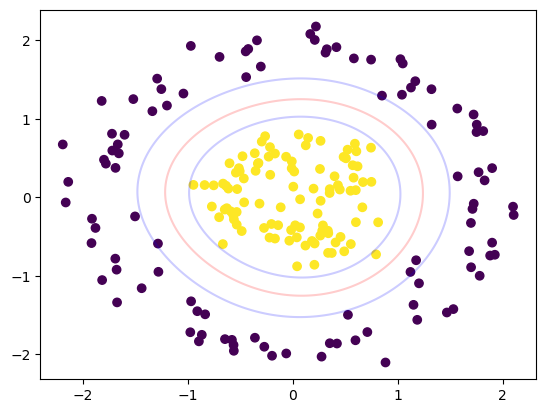

In [17]:
model = PolySVM(kernal="rbf",gamma=1.0)
model.fit(X_Std,y)
plt.scatter(X_Std[:,0],X_Std[:,1],c = y)
xx1, xx2 = np.meshgrid(
    np.arange(-2,2,.01),
    np.arange(-2,2,.01)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.decision_function(meshgred_points)
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z,alpha = .2,levels = [-1,0,1],colors = ["b","r","b"])
model.score(X_Std,y)

1.0

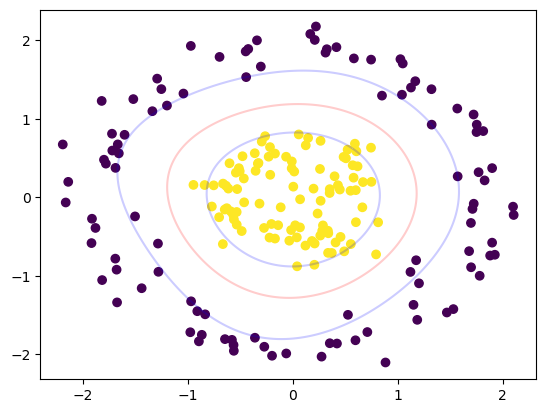

In [19]:
model = SVC(kernel="rbf",degree=2)
model.fit(X_Std,y)
plt.scatter(X_Std[:,0],X_Std[:,1],c = y)
xx1, xx2 = np.meshgrid(
    np.arange(-2,2,.01),
    np.arange(-2,2,.01)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.decision_function(meshgred_points)
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z,alpha = .2,levels = [-1,0,1],colors = ["b","r","b"])
model.score(X_Std,y)